<a href="https://colab.research.google.com/github/st3vejobs/DATA-604/blob/main/final_exam/Final_Exam_Question_1_DATA_604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Exam Question 1
# Shane Hylton 

# Quick Link To Exercise
1. [Exercises](#exercises)

# Modeling and Simulation in Python

Chapter 17

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [4]:
%matplotlib inline
try:
    import pint
except ImportError:
    !pip install pint
    import pint
    
try:
    from modsim import *
except ImportError:
    !pip install modsimpy
    from modsim import *

from modsim import *
from pint import UnitRegistry
units = UnitRegistry()

from pandas import read_html

from os.path import basename, exists

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 13.5 MB/s 


### Data

We have data from Pacini and Bergman (1986), "MINMOD: a computer program to calculate insulin sensitivity and pancreatic responsivity from the frequently sampled intravenous glucose tolerance test", *Computer Methods and Programs in Biomedicine*, 23: 113-122..

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/AllenDowney/ModSimPy/master/data/glucose_insulin.csv', index_col='time')

Here's what the glucose time series looks like.

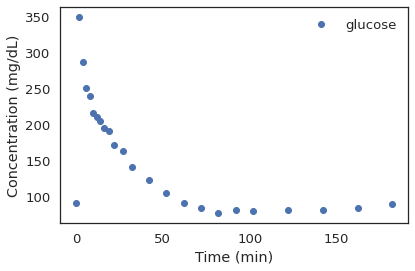

In [7]:
plot(data.glucose, 'bo', label='glucose')
decorate(xlabel='Time (min)',
         ylabel='Concentration (mg/dL)')

And the insulin time series.

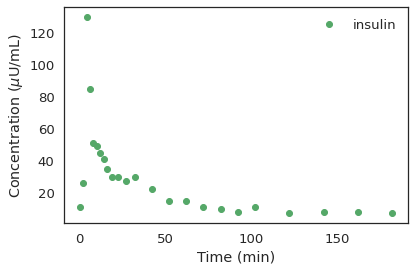

In [8]:
plot(data.insulin, 'go', label='insulin')
decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/mL)')

For the book, I put them in a single figure, using `subplot`

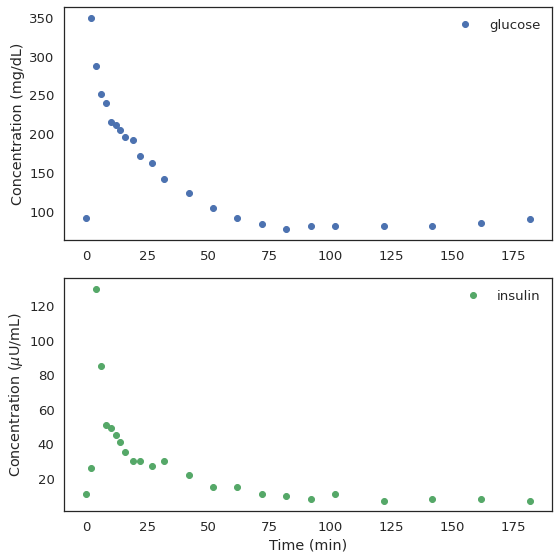

In [10]:
subplot(2, 1, 1)
plot(data.glucose, 'bo', label='glucose')
decorate(ylabel='Concentration (mg/dL)')

subplot(2, 1, 2)
plot(data.insulin, 'go', label='insulin')
decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/mL)')


### Interpolation

We have measurements of insulin concentration at discrete points in time, but we need to estimate it at intervening points.  We'll use `interpolate`, which takes a `Series` and returns a function:

The return value from `interpolate` is a function.

In [11]:
I = interpolate(data.insulin)

We can use the result, `I`, to estimate the insulin level at any point in time.

In [12]:
I(7)

68.0

`I` can also take an array of time and return an array of estimates:

In [13]:
t_0 = get_first_label(data)
t_end = get_last_label(data)
ts = linrange(t_0, t_end, endpoint=True)
I(ts)
type(ts)

numpy.ndarray

Here's what the interpolated values look like.

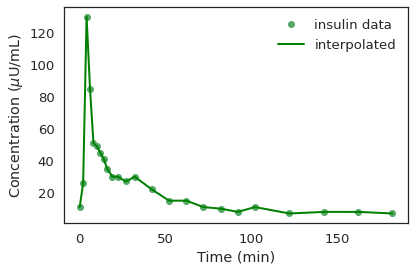

In [15]:
plot(data.insulin, 'go', label='insulin data')
plot(ts, I(ts), color='green', label='interpolated')

decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/mL)')



# Exercises<a name="exercises"></a>

**Exercise:** [Read the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) of `scipy.interpolate.interp1d`.  Pass a keyword argument to `interpolate` to specify one of the other kinds of interpolation, and run the code again to see what it looks like. 

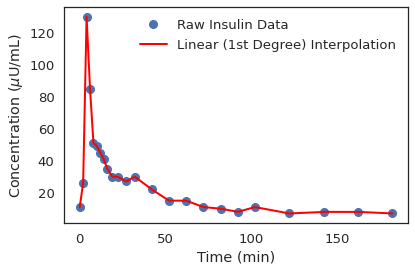

In [24]:
new_interpolation = interpolate(data.insulin,kind = 'slinear')
plot(data.insulin,'o', label = 'Raw Insulin Data',markersize = 8)
plot(ts, new_interpolation(ts), color='red', label='Linear (1st Degree) Interpolation')
decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/mL)')

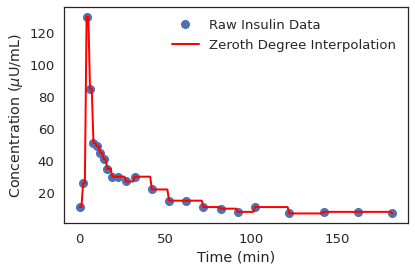

In [25]:
new_interpolation = interpolate(data.insulin,kind = 'zero')
plot(data.insulin,'o', label = 'Raw Insulin Data',markersize = 8)
plot(ts, new_interpolation(ts), color='red', label='Zeroth Degree Interpolation')
decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/mL)')

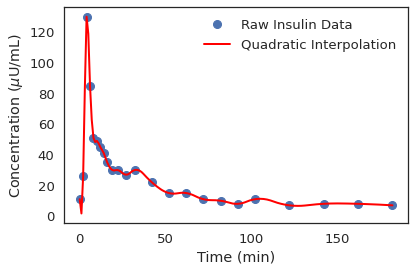

In [26]:
new_interpolation = interpolate(data.insulin,kind = 'quadratic')
plot(data.insulin,'o', label = 'Raw Insulin Data',markersize = 8)
plot(ts, new_interpolation(ts), color='red', label='Quadratic Interpolation')
decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/mL)')

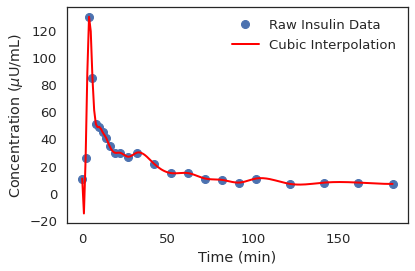

In [27]:
new_interpolation = interpolate(data.insulin,kind = 'cubic')
plot(data.insulin,'o', label = 'Raw Insulin Data',markersize = 8)
plot(ts, new_interpolation(ts), color='red', label='Cubic Interpolation')
decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/mL)')

### Comments

All four keywords appear to have the same impact on the plot.

## Part II

**Exercise:** Interpolate the glucose data and generate a plot, similar to the previous one, that shows the data points and the interpolated curve evaluated at the time values in `ts`.

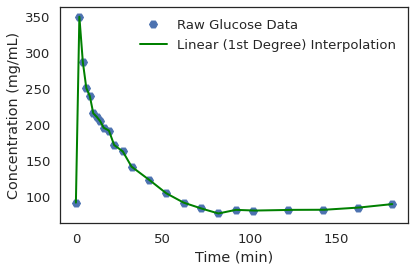

In [31]:
glucose_interpolation = interpolate(data.glucose,kind = 'slinear')
plot(data.glucose,'H', label = 'Raw Glucose Data',markersize = 8)
plot(ts, glucose_interpolation(ts), color='green', label='Linear (1st Degree) Interpolation')
decorate(xlabel='Time (min)',
         ylabel='Concentration (mg/mL)')

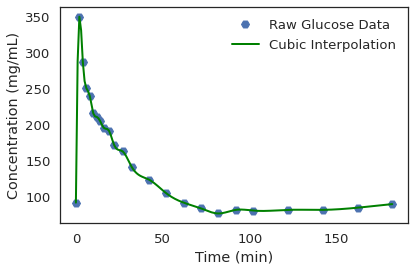

In [32]:
glucose_interpolation = interpolate(data.glucose,kind = 'cubic')
plot(data.glucose,'H', label = 'Raw Glucose Data',markersize = 8)
plot(ts, glucose_interpolation(ts), color='green', label='Cubic Interpolation')
decorate(xlabel='Time (min)',
         ylabel='Concentration (mg/mL)')

### Under the hood

In [ ]:
source_code(interpolate)